# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 3 :  Data Exploration and Visualization

## Reading: 

## Homework 1

- from https://data.worldbank.org/

- do a git pull
- follow the directions in the jupyter notebook
- submit the homework1.ipynb with your changes saved via Canvas

### Using `assert`

In [1]:
assert 1 == 1

In [2]:
assert 1 == 0

AssertionError: 

### Pivot Tables

- pivot for dataset transformation

- pivot_table for summarization

#### `pivot` for dataset transformation

In [3]:
import pandas as pd

A = [[1, 'rain_fall', .2],
     [1, 'temperature', 81],
     [2, 'rain_fall', 0]]

df = pd.DataFrame(A, columns=['site','measure','reading'])
df.head()

,site,measure,reading
0,1,rain_fall,0.2
1,1,temperature,81.0
2,2,rain_fall,0.0


In [4]:
df.pivot(index='site',columns='measure',values='reading')

measure,rain_fall,temperature
site,,
1,0.2,81.0
2,0.0,NaN


#### `pivot_table` for summarization

In [5]:
A = [[1, 'Manhattan', 'afternoon', 83],
     [1, 'Manhattan', 'morning', 79],
     [2, 'Manhattan', 'morning', 80],
     [3, 'Brooklyn', 'afternoon', 80]]

df = pd.DataFrame(A, columns=['site','borough','time_of_day','temp'])
df.head()

,site,borough,time_of_day,temp
0,1,Manhattan,afternoon,83
1,1,Manhattan,morning,79
2,2,Manhattan,morning,80
3,3,Brooklyn,afternoon,80


In [6]:
df.pivot_table('temp',index='borough',columns='time_of_day')

time_of_day,afternoon,morning
borough,,
Brooklyn,80.0,NaN
Manhattan,83.0,79.5


### Join Example

In [7]:
pop = pd.read_csv('../data/state-population.csv')
abbrevs = pd.read_csv('../data/state-abbrevs.csv')

In [8]:
print(pop.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [9]:
pd.merge(pop, abbrevs, left_on='state/region', right_on='abbreviation').head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [10]:
#using join

abbrevs.set_index('abbreviation',inplace=True)

In [11]:
pop.join(abbrevs, on='state/region', how='inner').head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


## Example Data: NYC Taxi data

found at: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

file used here: https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-01.csv

### Setup

In [12]:
import pandas as pd
import numpy as np

np.random.seed(123)

### Reading in data

In [13]:
# saving out a subset of the full data for analysis
#df = pd.read_csv('../data/yellow_tripdata_2017-01.csv',parse_dates=True)
#df = df.iloc[np.random.permutation(len(df))[:10000],:]
#df.to_csv('../data/yellow_tripdata_2017-01_subset10000rows.csv')

In [14]:
df = pd.read_csv('../data/yellow_tripdata_2017-01_subset10000rows.csv',parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Unnamed: 0               10000 non-null int64
VendorID                 10000 non-null int64
tpep_pickup_datetime     10000 non-null object
tpep_dropoff_datetime    10000 non-null object
passenger_count          10000 non-null int64
trip_distance            10000 non-null float64
RatecodeID               10000 non-null int64
store_and_fwd_flag       10000 non-null object
PULocationID             10000 non-null int64
DOLocationID             10000 non-null int64
payment_type             10000 non-null int64
fare_amount              10000 non-null float64
extra                    10000 non-null float64
mta_tax                  10000 non-null float64
tip_amount               10000 non-null float64
tolls_amount             10000 non-null float64
improvement_surcharge    10000 non-null float64
total_amount             10000 non-null float64
dtypes: float64(8), int64(7), object(3)
memor

In [15]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [16]:
df = df[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','fare_amount','tip_amount']]

In [17]:
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
tpep_pickup_datetime     10000 non-null datetime64[ns]
tpep_dropoff_datetime    10000 non-null datetime64[ns]
trip_distance            10000 non-null float64
fare_amount              10000 non-null float64
tip_amount               10000 non-null float64
trip_duration            10000 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 468.8 KB


## Single variable statistics & Visualizations

### Exploring Location


$\Large \bar{x} = \frac{1}{n} \sum x_i$

In [18]:
df.trip_duration.mean()

860.34910000000002

In [19]:
df.trip_duration.median()

606.0

In [20]:
from scipy.stats import trim_mean
print(trim_mean(df.trip_duration, proportiontocut=.1))

679.713375


In [21]:
print(trim_mean(df.trip_duration, proportiontocut=.2))

643.1025


### Exploring Variability

$\Large s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$

$\Large s = \sqrt{s^2}$

In [22]:
df.trip_duration.std()

2681.6172475831527

### Quantiles or percentiles

In [23]:
print(np.percentile(df.trip_duration, 75))

997.25


In [24]:
df.trip_duration.describe()

count    10000.000000
mean       860.349100
std       2681.617248
min          0.000000
25%        375.000000
50%        606.000000
75%        997.250000
max      86338.000000
Name: trip_duration, dtype: float64

In [25]:
print(np.percentile(df.trip_duration, 99))

3185.17


In [26]:
print(df.trip_duration.max())
print(86400 / 60 / 60)

86338
24.0


### Plotting with Matplotlib

In [27]:
import matplotlib.pyplot as plt

# to avoid having to do plt.show()
%matplotlib inline

In [28]:
# use the seaborn style
plt.style.use('seaborn')

### Histograms

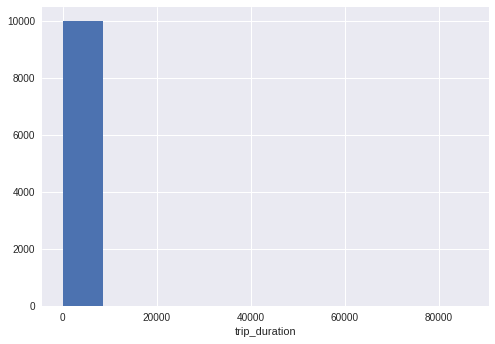

In [29]:
_ = plt.hist(df.trip_duration)
_ = plt.xlabel('trip_duration')

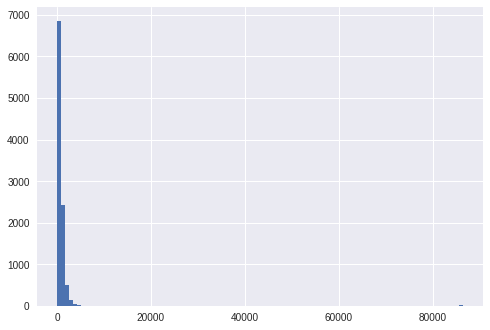

In [30]:
_ = plt.hist(df.trip_duration, bins=100)

In [31]:
x = np.random.normal(df.trip_duration.mean(),df.trip_duration.std(),10000)

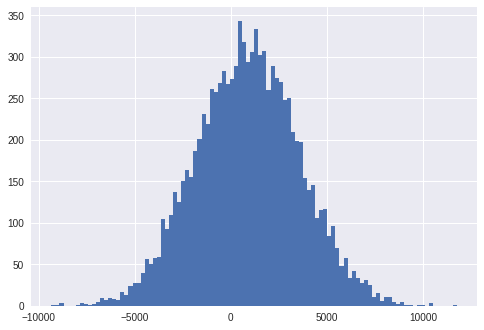

In [32]:
_ = plt.hist(x, bins=100)

### Plotting with Pandas

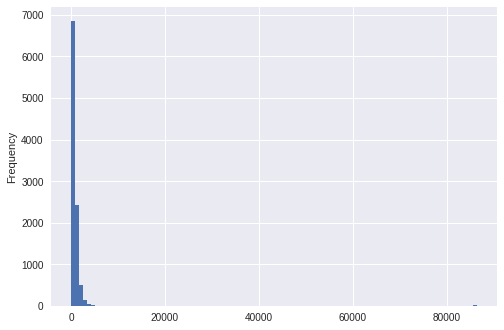

In [33]:
_ = df.trip_duration.plot.hist(bins=100)

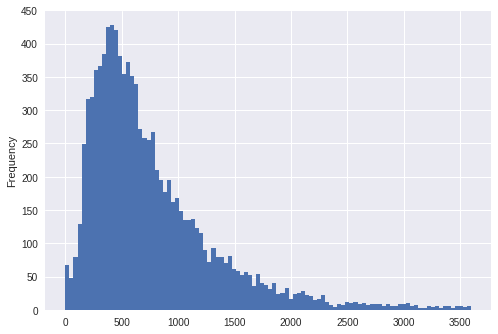

In [34]:
_ = df[df.trip_duration < 3600].trip_duration.plot.hist(bins=100)

### Plotting with Seaborn

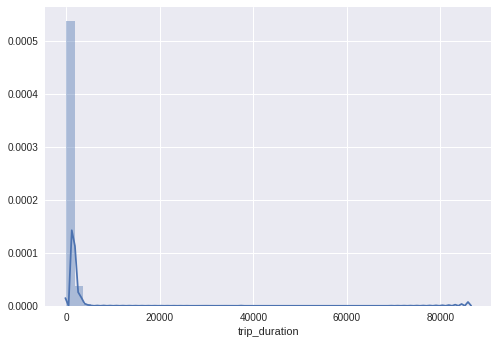

In [35]:
import seaborn as sns

_ = sns.distplot(df.trip_duration)

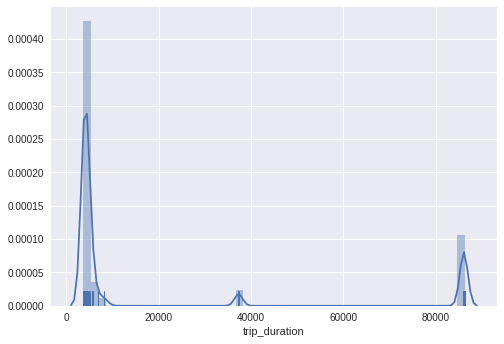

In [36]:
_ = sns.distplot(df[df.trip_duration > 3600].trip_duration, rug=True)

### Box Plots

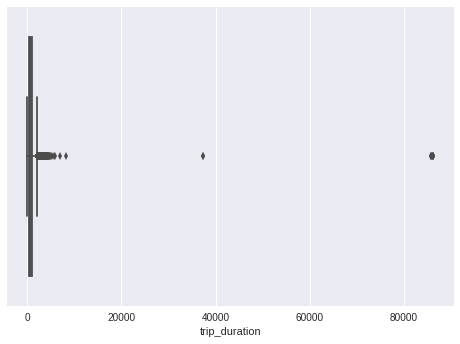

In [37]:
sns.boxplot(df.trip_duration)

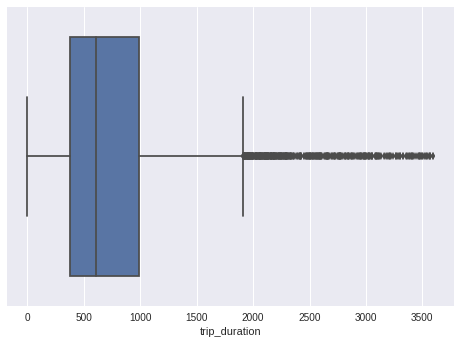

In [38]:
sns.boxplot(df[df.trip_duration < 3600].trip_duration)

In [39]:
#Inter Quartile Range
perc_25 = np.percentile(df[df.trip_duration < 3600].trip_duration, 25)
perc_75 = np.percentile(df[df.trip_duration < 3600].trip_duration, 75)

IQR = perc_75-perc_25
print(IQR)

615.0


In [40]:
print(perc_75 + 1.5*IQR)
print(perc_25 - 1.5*IQR)

1911.5
-548.5


In [41]:
1950 / 60

32.5

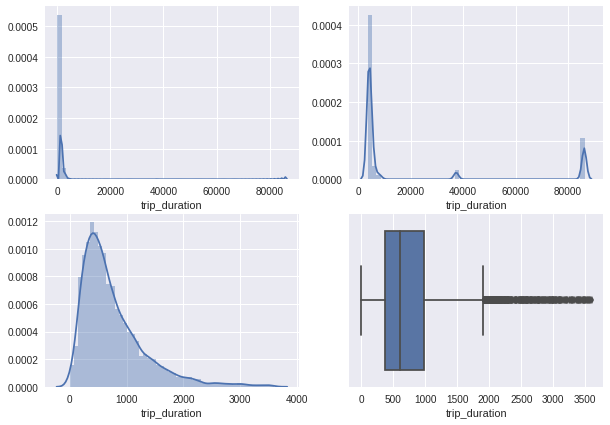

In [42]:
fig, ax = plt.subplots(2,2, figsize=(10,7))

_ = sns.distplot(df.trip_duration, ax=ax[0][0])
_ = sns.distplot(df[df.trip_duration > 3600].trip_duration, ax=ax[0][1])
_ = sns.distplot(df[df.trip_duration <= 3600].trip_duration, ax=ax[1][0])
_ = sns.boxplot(df[df.trip_duration <= 3600].trip_duration, ax=ax[1][1])

## Analyzing and Plotting Relationships

### Scatter plots for real values

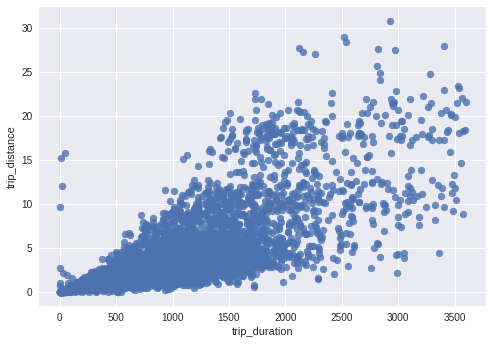

In [43]:
lt_hour = df.trip_duration < 3600
_ = plt.scatter(df[lt_hour].trip_duration,
                df[lt_hour].trip_distance,
                alpha=0.8
               )
_ = plt.xlabel('trip_duration')
_ = plt.ylabel('trip_distance')

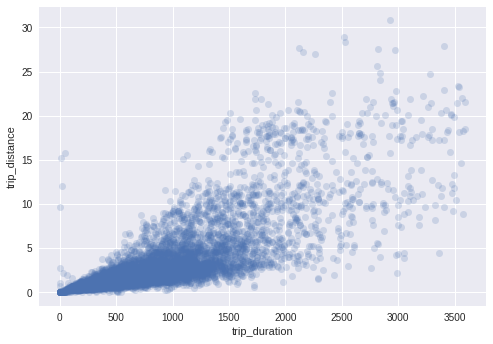

In [44]:
_ = sns.regplot(x='trip_duration',
                y='trip_distance',
                data=df[lt_hour], 
                scatter_kws={'alpha':0.2},
                fit_reg=False
               )

### Correlation

$\Large r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_xs_y}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/640px-Correlation_examples2.svg.png?1506032928993">

In [45]:
from scipy.stats import pearsonr
r,p = pearsonr(df[lt_hour].trip_duration, df[lt_hour].trip_distance)
print(r)

0.786072504713


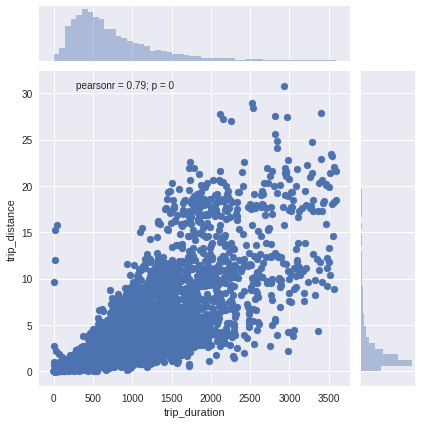

In [46]:
_= sns.jointplot(x='trip_duration',
                 y='trip_distance',
                 data=df[lt_hour],
                )

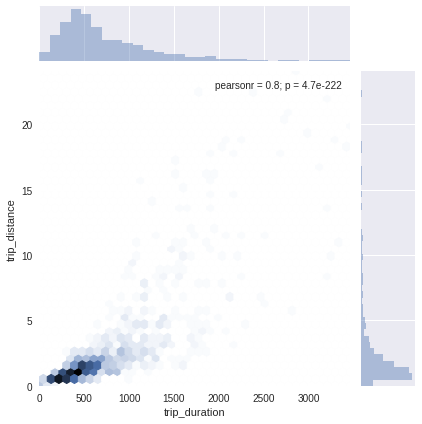

In [47]:
_= sns.jointplot(x='trip_duration',
                 y='trip_distance',
                 data=df[lt_hour & (df.trip_distance < 30)].iloc[:1000],
                 kind='hex'
                )

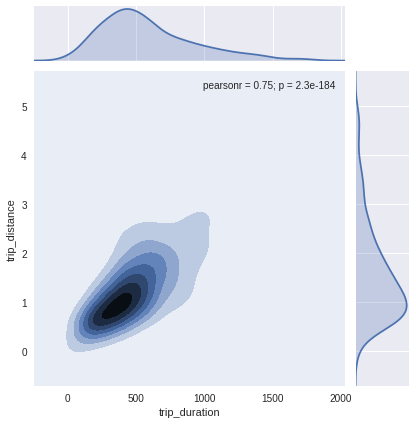

In [48]:
_= sns.jointplot(x='trip_duration',
                 y='trip_distance',
                 data=df[(df.trip_duration < 1800) & (df.trip_distance < 5)].iloc[:1000],
                 kind='kde'
                )

### Comparing with categorical variables

In [49]:
df['day_of_week'] = df.tpep_pickup_datetime.dt.dayofweek

In [50]:
# 0 = Monday, 6 = Sunday
df[lt_hour].day_of_week.value_counts()

1    1556
6    1501
4    1460
5    1412
3    1363
0    1333
2    1324
Name: day_of_week, dtype: int64

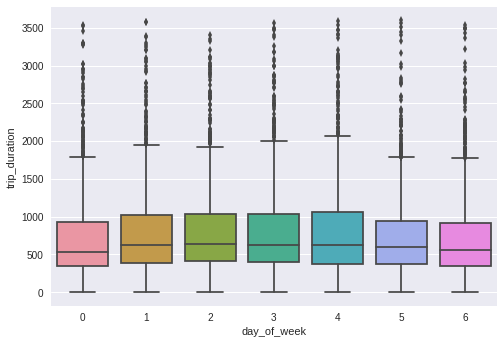

In [51]:
sns.boxplot(x='day_of_week',y='trip_duration',data=df[lt_hour])

In [52]:
df[lt_hour].groupby('day_of_week').trip_duration.mean()

day_of_week
0    716.667667
1    769.060411
2    804.906344
3    800.666178
4    802.027397
5    728.776912
6    711.337775
Name: trip_duration, dtype: float64

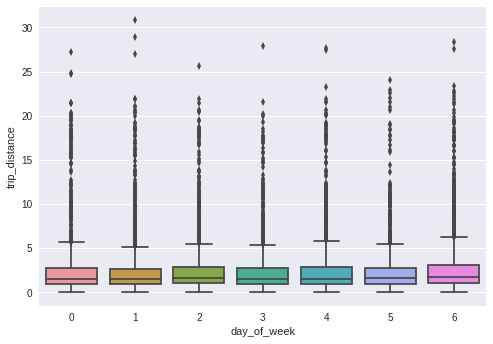

In [53]:
sns.boxplot(x='day_of_week',y='trip_distance',data=df[lt_hour])

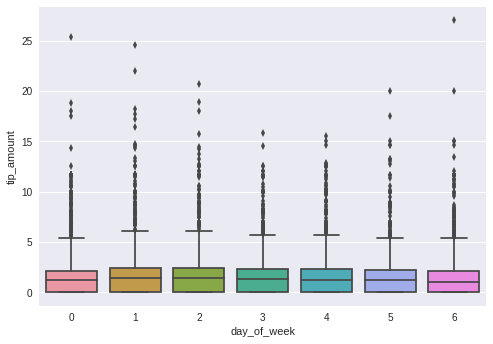

In [54]:
sns.boxplot(x='day_of_week',y='tip_amount',data=df[lt_hour])

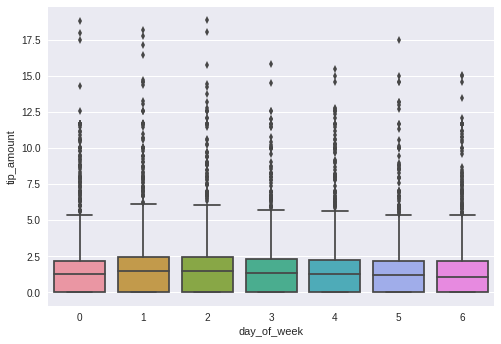

In [55]:
sns.boxplot(x='day_of_week',y='tip_amount',data=df[lt_hour & (df.tip_amount < 20)])

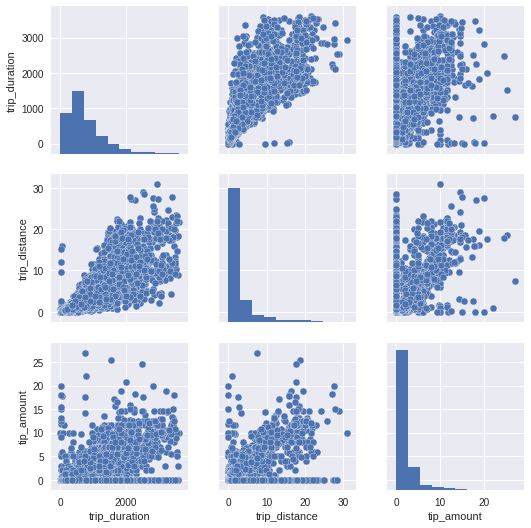

In [56]:
sns.pairplot(df.loc[lt_hour & (df.tip_amount < 50),['trip_duration','trip_distance','tip_amount']])